In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('SMSSpamCollection.txt', sep='\t', names=['label', 'message'])
print(df.head(10))

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [5]:
# Text preprocessing and feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [6]:
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)
nb_predictions = nb_classifier.predict(X_test_vectorized)

In [7]:
# SVM Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, y_train)
svm_predictions = svm_classifier.predict(X_test_vectorized)

In [8]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)
rf_predictions = rf_classifier.predict(X_test_vectorized)

In [9]:
# Evaluate the models
print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))

Naive Bayes Results:
Accuracy: 0.9919282511210762
Confusion Matrix:
 [[966   0]
 [  9 140]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [10]:
print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))


SVM Results:
Accuracy: 0.989237668161435
Confusion Matrix:
 [[966   0]
 [ 12 137]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       1.00      0.92      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [11]:
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Results:
Accuracy: 0.9847533632286996
Confusion Matrix:
 [[966   0]
 [ 17 132]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store the accuracy scores for each classifier
accuracy_scores = {
    'Naive Bayes': accuracy_score(y_test, nb_predictions),
    'SVM': accuracy_score(y_test, svm_predictions),
    'Random Forest': accuracy_score(y_test, rf_predictions)
}

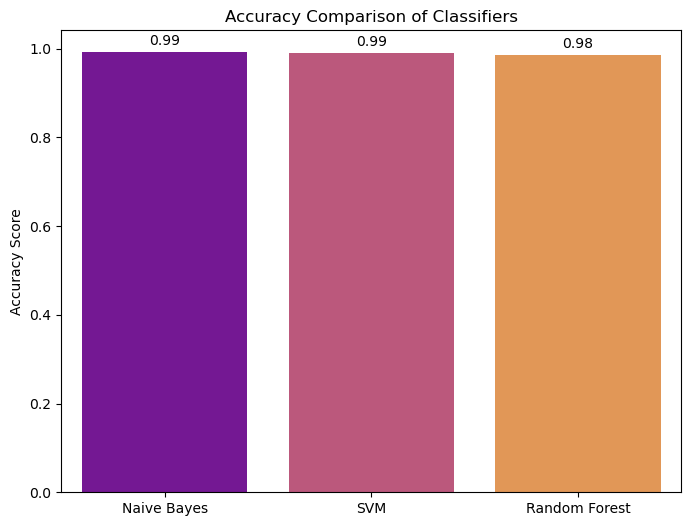

In [20]:
# Plot the accuracy differences with a grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="plasma")
plt.title('Accuracy Comparison of Classifiers')
plt.ylabel('Accuracy Score')

# Annotate the differences between bars
for i, (model, accuracy) in enumerate(accuracy_scores.items()):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.show()

In [24]:
# Create a pipeline with TF-IDF and Naive Bayes
model = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    MultinomialNB()
)

# Train the model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.97847533632287
Confusion Matrix:
 [[966   0]
 [ 24 125]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

